# Computing Reference Intervals for Sea Water

In [1]:
%matplotlib inline
import math
import scipy.stats
import scipy.special
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.seterr(all='raise');

In [2]:
# Read data from file
df = pd.read_csv('Sea_Water_Values.csv')

# Remove columns with no data
df = df.dropna(how='all', axis=1)

# Define labels that we want to analyze statistically
cols_in = [
    'Magnesium (mg/dl)',
    'Sodium (mEq/L)',
    'Potassium (mEq/L)',
    'Chloride (mEq/L)',
    'Calcium (mg/dL)'
]

cols_out = [
    'Magnesium (mEq/L)',
    'Sodium (mEq/L)',
    'Potassium (mEq/L)',
    'Chloride (mEq/L)',
    'Calcium (mEq/L)'
]

# Convert units to SI. Source: https://onlinelibrary.wiley.com/doi/pdf/10.1002/9780470344484.app9
df = df[cols_in]
df['Magnesium (mEq/L)'] = df['Magnesium (mg/dl)'] * 0.882
df['Calcium (mEq/L)'] = df['Calcium (mg/dL)'] * 0.5
df = df[cols_out]

### Compute Reference Intervals
Compute max, min, mean, median and standard deviation on the raw data. Then perform a Box-Cox transformation, and compute the 90% and 95% reference interval on the transformed data. Lastly, inverse the transformation to get the resulting reference intervals in the original data.

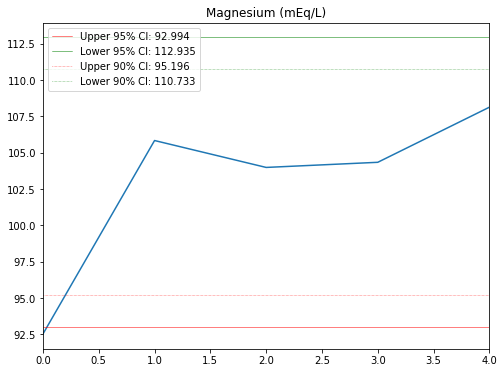

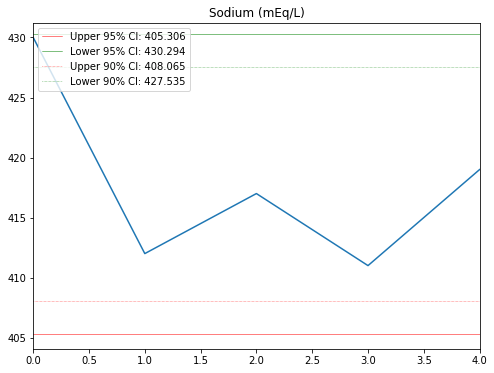

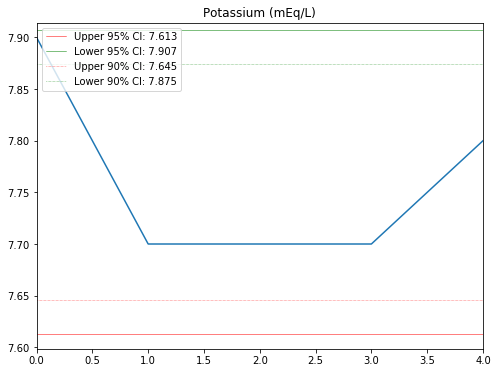

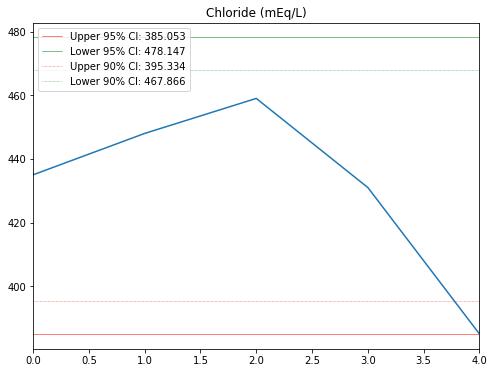

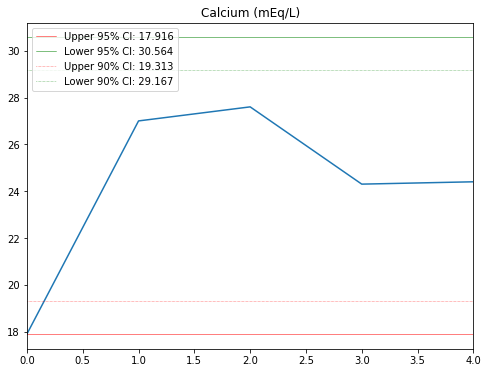

In [3]:
ri_records = []

for col in df.columns:
    
    # Separate data for specific feature
    vec = df[col].copy()
    
    # Replace outliers with median
    mean = vec.mean()
    std3 = vec.std() * 3
    median = vec[(vec > mean - std3) & (vec < mean + std3)].median()
    vec[(vec > mean + std3) | (vec < mean - std3)] = np.nan
    vec.fillna(median, inplace=True)
    
    # Plot data prior to transformation
    ax = vec.plot(title=col, figsize=(8,6))
    
    # Compute variables not affected by transformation
    std = vec.std()
    vmax = vec.max()
    vmin = vec.min()
    mean = vec.mean()
    median = vec.median()
    
    # Compute estimated upper and lower limits without transformation
    band90 = vec.std() * scipy.stats.norm.ppf(.90)
    band95 = vec.std() * scipy.stats.norm.ppf(.95)
    ci90 = (vec.mean() - band90, vec.mean() + band90)
    ci95 = (vec.mean() - band95, vec.mean() + band95)
    confidence = scipy.stats.t.interval(0.90, 10, loc=vec.mean(), scale=vec.std())
    confidence = (confidence[0], confidence[1])
    
    # Plot upper and lower limits against data
    hi1 = ax.axhline(y=ci95[0], c="red", linewidth=0.5, label='Upper 95%% CI: %.3f' % ci95[0])
    hi2 = ax.axhline(y=ci90[0], c="red", linestyle='dotted', linewidth=0.5, label='Upper 90%% CI: %.3f' % ci90[0])
    lo1 = ax.axhline(y=ci95[1], c="green", linewidth=0.5, label='Lower 95%% CI: %.3f' % ci95[1])
    lo2 = ax.axhline(y=ci90[1], c="green", linestyle='dotted', linewidth=0.5, label='Lower 90%% CI: %.3f' % ci90[1])
    plt.legend(loc=2, handles=[hi1, lo1, hi2, lo2])
    plt.show()
    
    # Store in records
    ri_records.append((col, ci90, ci95, mean, median, vmax, vmin, std))


### Output Computed Reference Intervals

In [4]:
pd.DataFrame(ri_records, columns=(
    'Measurement', '90% Confidence Interval', '95% Confidence Interval',
    'Mean', 'Median', 'Max', 'Min', 'Std Dev')).set_index('Measurement')

90% Confidence Interval  \
Measurement                                                  
Magnesium (mEq/L)  (95.19635411860683, 110.73300588139317)   
Sodium (mEq/L)     (408.0652681724588, 427.53473182754124)   
Potassium (mEq/L)    (7.645374543310839, 7.87462545668916)   
Chloride (mEq/L)    (395.3341285551833, 467.8658714448167)   
Calcium (mEq/L)    (19.312605051433387, 29.16739494856661)   

                                    95% Confidence Interval       Mean  \
Measurement                                                              
Magnesium (mEq/L)     (92.9941416737325, 112.9352183262675)  102.96468   
Sodium (mEq/L)      (405.30560696547025, 430.2943930345298)  417.80000   
Potassium (mEq/L)   (7.612879819083977, 7.9071201809160225)    7.76000   
Chloride (mEq/L)    (385.05325792238943, 478.1467420776106)  431.60000   
Calcium (mEq/L)    (17.915757050690374, 30.564242949309623)   24.24000   

                     Median       Max       Min    Std Dev  
Measurement                                                 
Magnesium (mEq/L)  104.3406  108.1332   92.5218   6.061657  
Sodium (mEq/L)     417.0000  430.0000  411.0000   7.596052  
Potassium (mEq/L)    7.7000    7.9000    7.7000   0.089443  
Chloride (mEq/L)   435.0000  459.0000  385.0000  28.298410  
Calcium (mEq/L)     24.4000   27.6000   17.9000   3.844867